<a href="https://colab.research.google.com/github/BungaKausalya4/ContentFlow/blob/main/CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Install Dependencies

In [ ]:
!pip install pandas scikit-learn xgboost matplotlib seaborn wordcloud
!pip install transformers torch
!pip install langchain_community replicate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 802.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 115.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Load Dataset Kaggle: Amazon Electronics Reviews

In [ ]:
df = pd.read_csv("Reviews.csv")  # ganti sesuai nama file

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (34192, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Preprocessing

In [ ]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

# pakai nama kolom sesuai dataset
df = df[['Text', 'Score', 'HelpfulnessNumerator', 'Summary']].dropna()

df['sentiment'] = df['Score'].apply(label_sentiment)

print(df['sentiment'].value_counts())
df.head()

sentiment
positive    26339
negative     5056
neutral      2795
Name: count, dtype: int64


,Text,Score,HelpfulnessNumerator,Summary,sentiment
0,I have bought several of the Vitality canned d...,5,1,Good Quality Dog Food,positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,0,Not as Advertised,negative
2,This is a confection that has been around a fe...,4,1,"""Delight"" says it all",positive
3,If you are looking for the secret ingredient i...,2,3,Cough Medicine,negative
4,Great taffy at a great price. There was a wid...,5,0,Great taffy,positive


Train-Test Split & TF-IDF

In [ ]:
X = df['Text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Baseline Models Logistic Regression, RandomForest, XGBoost

In [ ]:
# ================== ENCODE LABEL ==================
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # negative=0, neutral=1, positive=2

# ================== SPLIT DATA ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# ================== TF-IDF ==================
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Train shape:", X_train_tfidf.shape, " Test shape:", X_test_tfidf.shape)

# ================== BASELINE COMPARISON (3 MODELS) ==================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "XGBoost (Default)": XGBClassifier(eval_metric='mlogloss', random_state=42, tree_method="hist")
}

results = {}

print("===== Perbandingan Model Awal =====")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} → Accuracy: {acc:.4f}")

# ================== HYPERPARAMETER TUNING (XGBoost) ==================
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.05, 0.1, 0.2, 0.3]
}

# sample sebagian data dulu untuk tuning (hemat waktu)
X_sample, y_sample = resample(X_train_tfidf, y_train,
                              n_samples=50000, random_state=42, stratify=y_train)

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='mlogloss', random_state=42, tree_method="hist"),
    param_distributions=param_dist,
    scoring='accuracy',
    cv=3,
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_sample, y_sample)
best_model = random_search.best_estimator_

# retrain dengan full train set
best_model.fit(X_train_tfidf, y_train)

train_acc_tuned = accuracy_score(y_train, best_model.predict(X_train_tfidf))
test_acc_tuned = accuracy_score(y_test, best_model.predict(X_test_tfidf))

print("\n===== Model Setelah Tuning (XGBoost) =====")
print(f"Best Params: {random_search.best_params_}")
print(f"Train Accuracy: {train_acc_tuned:.4f}")
print(f"Test Accuracy:  {test_acc_tuned:.4f}")

# ================== CLASSIFICATION REPORT FINAL ==================
y_pred_final = best_model.predict(X_test_tfidf)

print("\n===== Classification Report (Final Model) =====")
print(classification_report(le.inverse_transform(y_test),
                            le.inverse_transform(y_pred_final)))


Train shape: (23933, 3000)  Test shape: (10257, 3000)
===== Perbandingan Model Awal =====
Logistic Regression → Accuracy: 0.7538
Random Forest → Accuracy: 0.8294
XGBoost (Default) → Accuracy: 0.8327
Fitting 3 folds for each of 10 candidates, totalling 30 fits

===== Model Setelah Tuning (XGBoost) =====
Best Params: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.3}
Train Accuracy: 0.9886
Test Accuracy:  0.8477

===== Classification Report (Final Model) =====
              precision    recall  f1-score   support

    negative       0.75      0.56      0.64      1517
     neutral       0.54      0.17      0.26       838
    positive       0.87      0.97      0.92      7902

    accuracy                           0.85     10257
   macro avg       0.72      0.57      0.61     10257
weighted avg       0.82      0.85      0.82     10257



Visualisasi Confusion Matrix

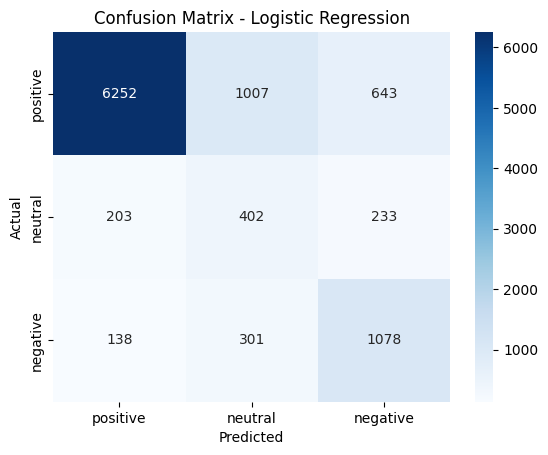

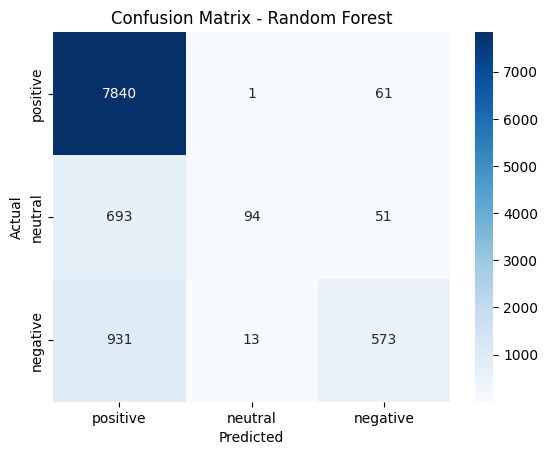

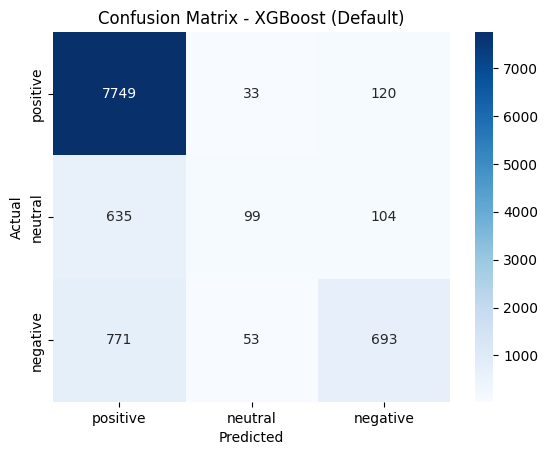

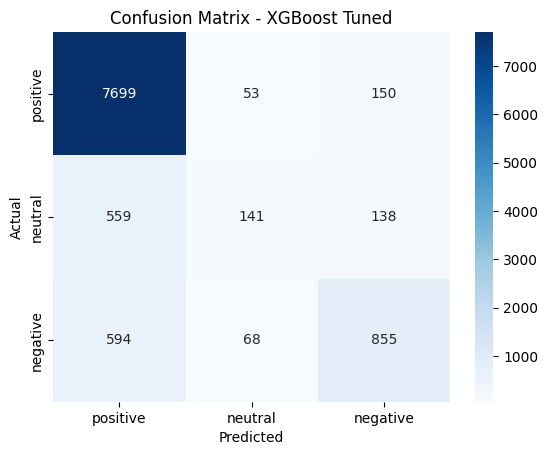

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    # ubah angka → label string
    y_true_labels = le.inverse_transform(y_true)
    y_pred_labels = le.inverse_transform(y_pred)

    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=["positive","neutral","negative"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["positive","neutral","negative"],
                yticklabels=["positive","neutral","negative"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    plot_confusion(y_test, y_pred, name)

# untuk model hasil tuning juga
plot_confusion(y_test, y_pred_final, "XGBoost Tuned")


WordCloud (Kata kunci review)

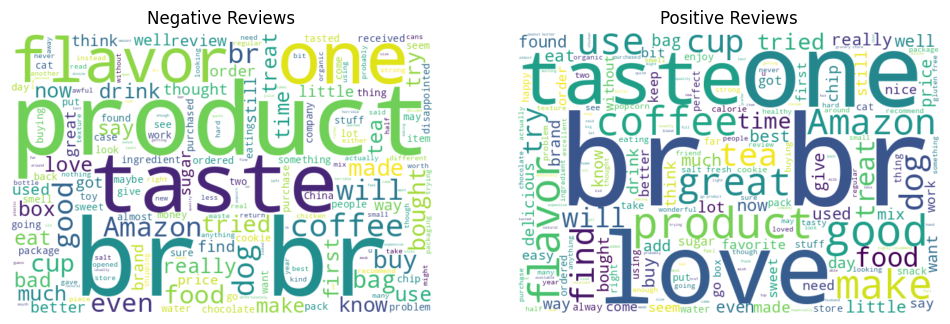

In [ ]:
neg_reviews = " ".join(df[df['sentiment']=='negative']['Text'])
pos_reviews = " ".join(df[df['sentiment']=='positive']['Text'])

wc_neg = WordCloud(width=600, height=400, background_color='white').generate(neg_reviews)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(pos_reviews)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_neg, interpolation='bilinear'); plt.axis("off"); plt.title("Negative Reviews")
plt.subplot(1,2,2)
plt.imshow(wc_pos, interpolation='bilinear'); plt.axis("off"); plt.title("Positive Reviews")
plt.show()

IBM Granite Integration (Replicate API)

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
granite = Replicate(model="ibm-granite/granite-3.3-8b-instruct", replicate_api_token=api_token)

# Contoh review sample
sample_reviews = df['Text'].sample(5, random_state=42).tolist()
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(sample_reviews)])

# Prompt Granite
prompt = f"""
Classify and summarize these customer reviews.
Identify key positive points, negative points, and overall satisfaction trend.
Then, provide 3 actionable recommendations for the e-commerce company.

{reviews_text}
"""

parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": 1,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length",
    "stopping_sequence": None
}

response = granite.invoke(prompt, parameters=parameters)
print("Granite Insight & Recommendations:\n")
print(response)

Granite Insight & Recommendations:

**Classification and Summary:**

1. **K-Cup Coffee (Review 1):** Positive review. The customer appreciates the variety of K-cups for office staff, particularly those who enjoy sweet, flavored coffee. They acknowledge it's instant but highlight the high satisfaction among users.

2. **Dried Mango (Review 2):** Positive review. The customer expresses relief at finding a reasonably priced alternative to an overpriced product they previously purchased. They're excited to return to a healthier snacking habit.

3. **Grain-Free Cat Food (Review 3):** Mixed to positive review. The customer reports that Funky Chunky is the only food their two picky cats will consistently eat, albeit with one cat (Calie) being more reluctant than the other (Dylan).

4. **Pretzels (Review 4):** Neutral review. This was a gift, so the reviewer can't personally attest to its quality but hopes the recipient enjoys it.

5. **Dog Treats (Review 5):** Positive review. The customer is